In [32]:
import os
import sys
import numpy as np
import pylab as plfrom evalChisq import evalChisq
from scipy.stats import chisquare

from IPython.display import Image


SyntaxError: invalid syntax (<ipython-input-32-15066ee71e16>, line 4)

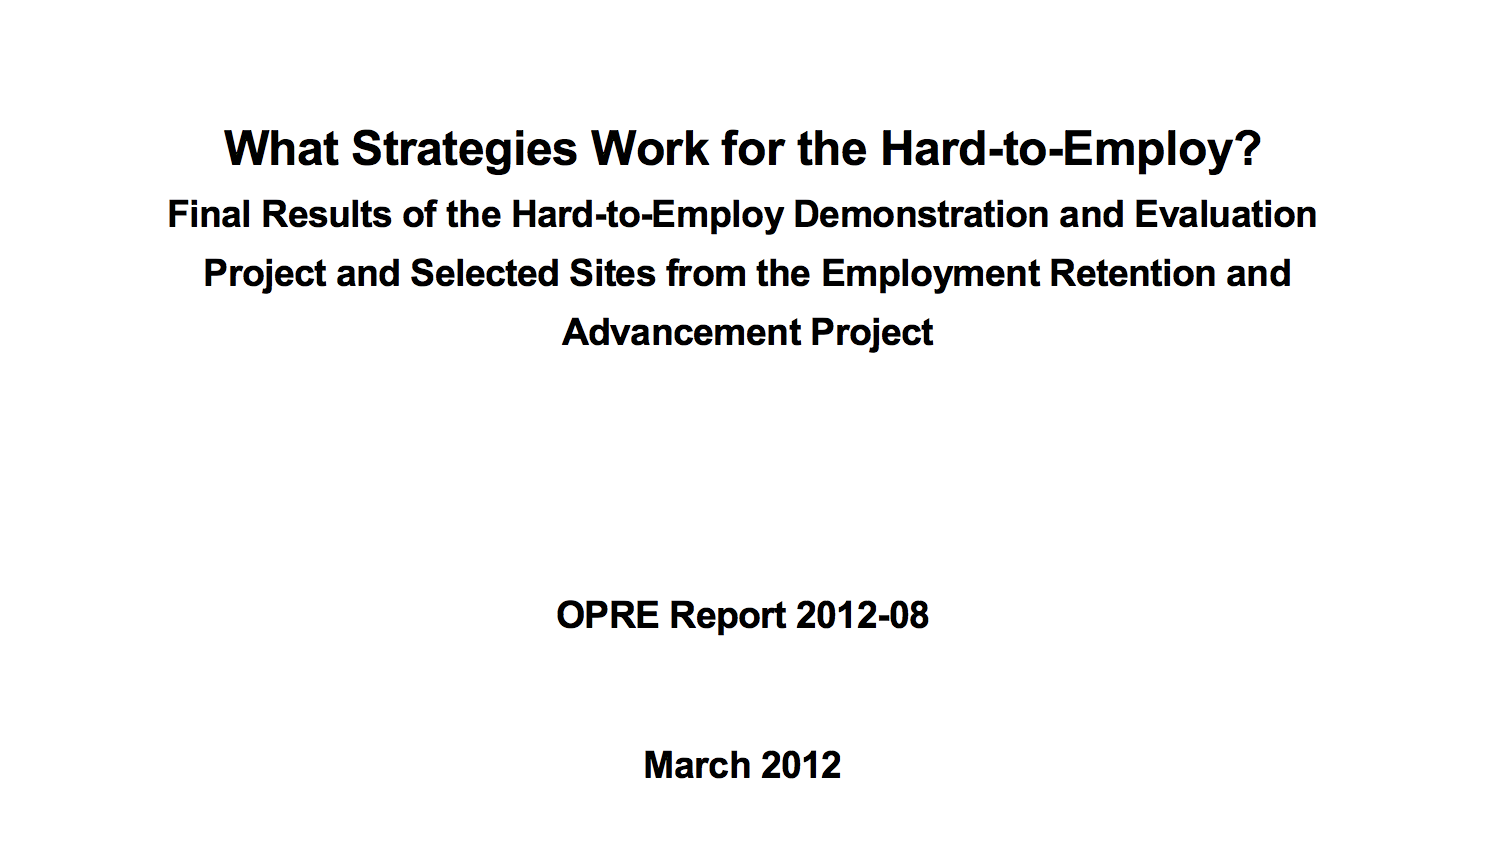

In [3]:
Image(filename= 'HW6_image1.png')

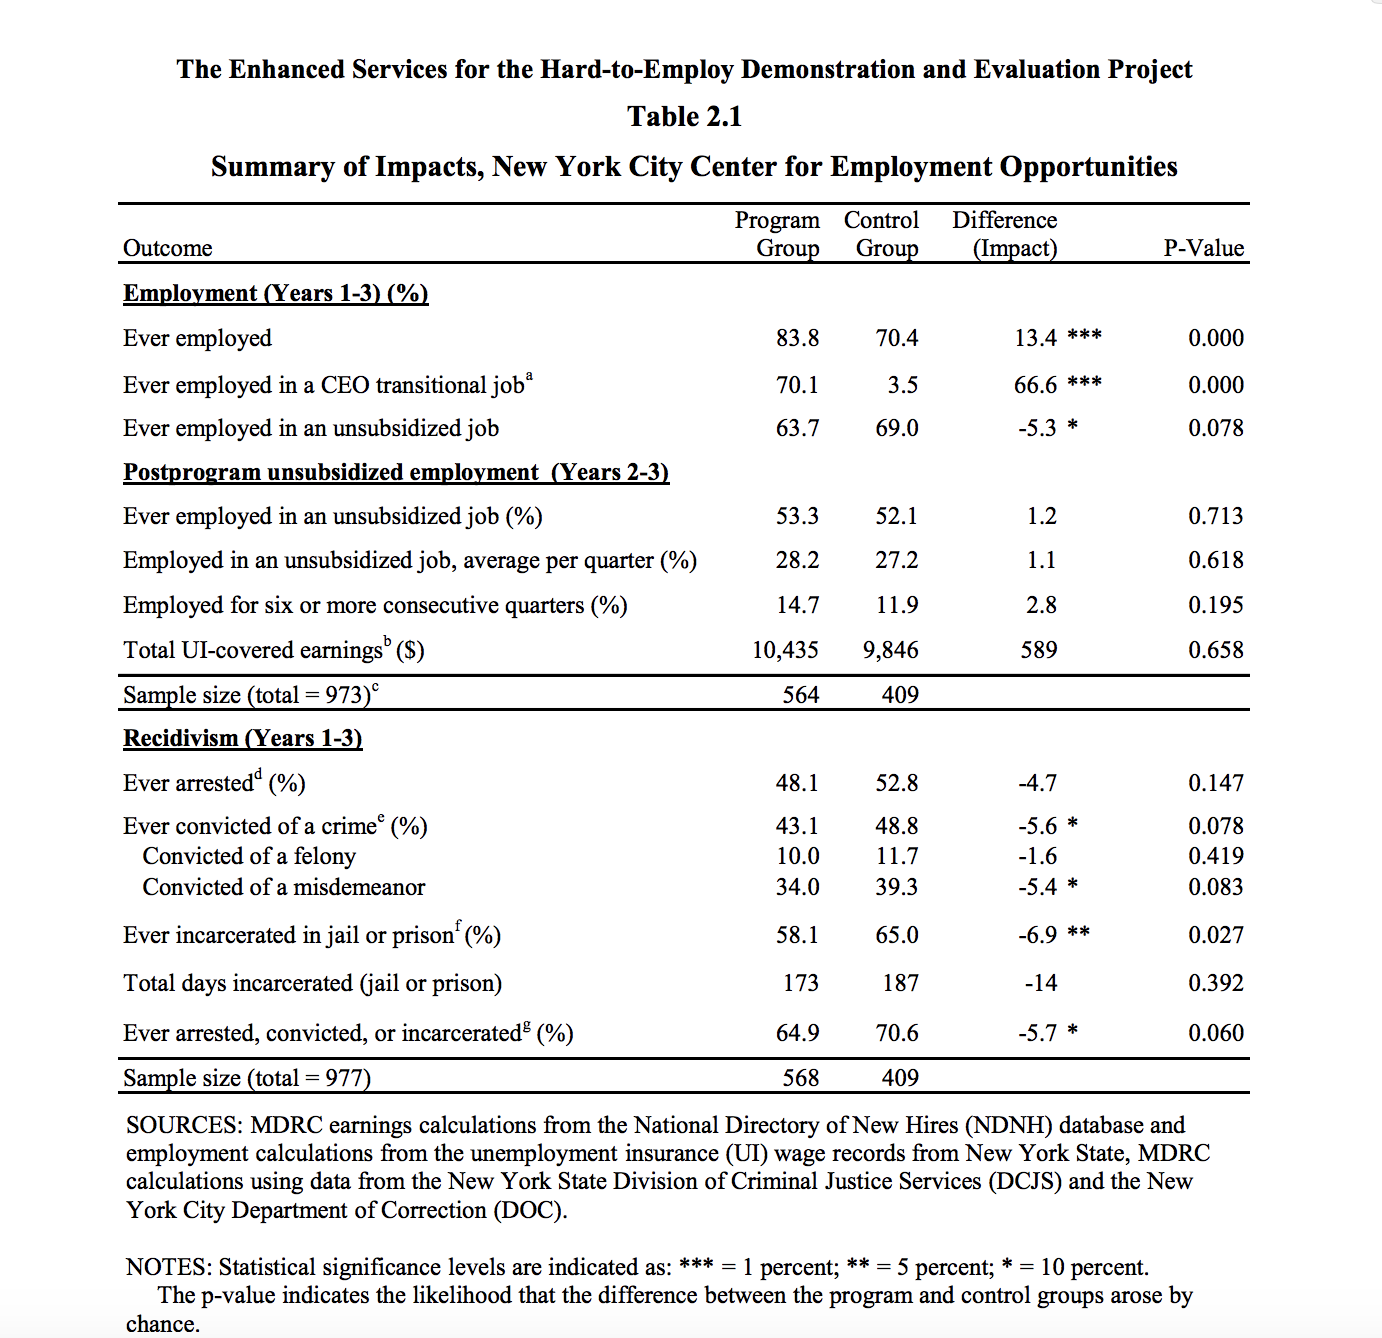

In [4]:
Image(filename= 'HW6_image2.png')

In [5]:

# first thing: choose your significance threshold
alpha=0.05



# we like fractions better then percentages. as a rule of thumb, either use fractions or counts. 
# 0 for control group, 1 for program group

P_0 = 3.5 * 0.01 
P_1 = 70.1 * 0.01

if P_0 - P_1 >= 0:
    # we are done
    print ("the Null holds")
else:
    print ("we must assess the statistical significance")

#sample sizes 

n_0 = 409
n_1 = 564
    
#lets get the counts by multiplying by the sample size

Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

we must assess the statistical significance


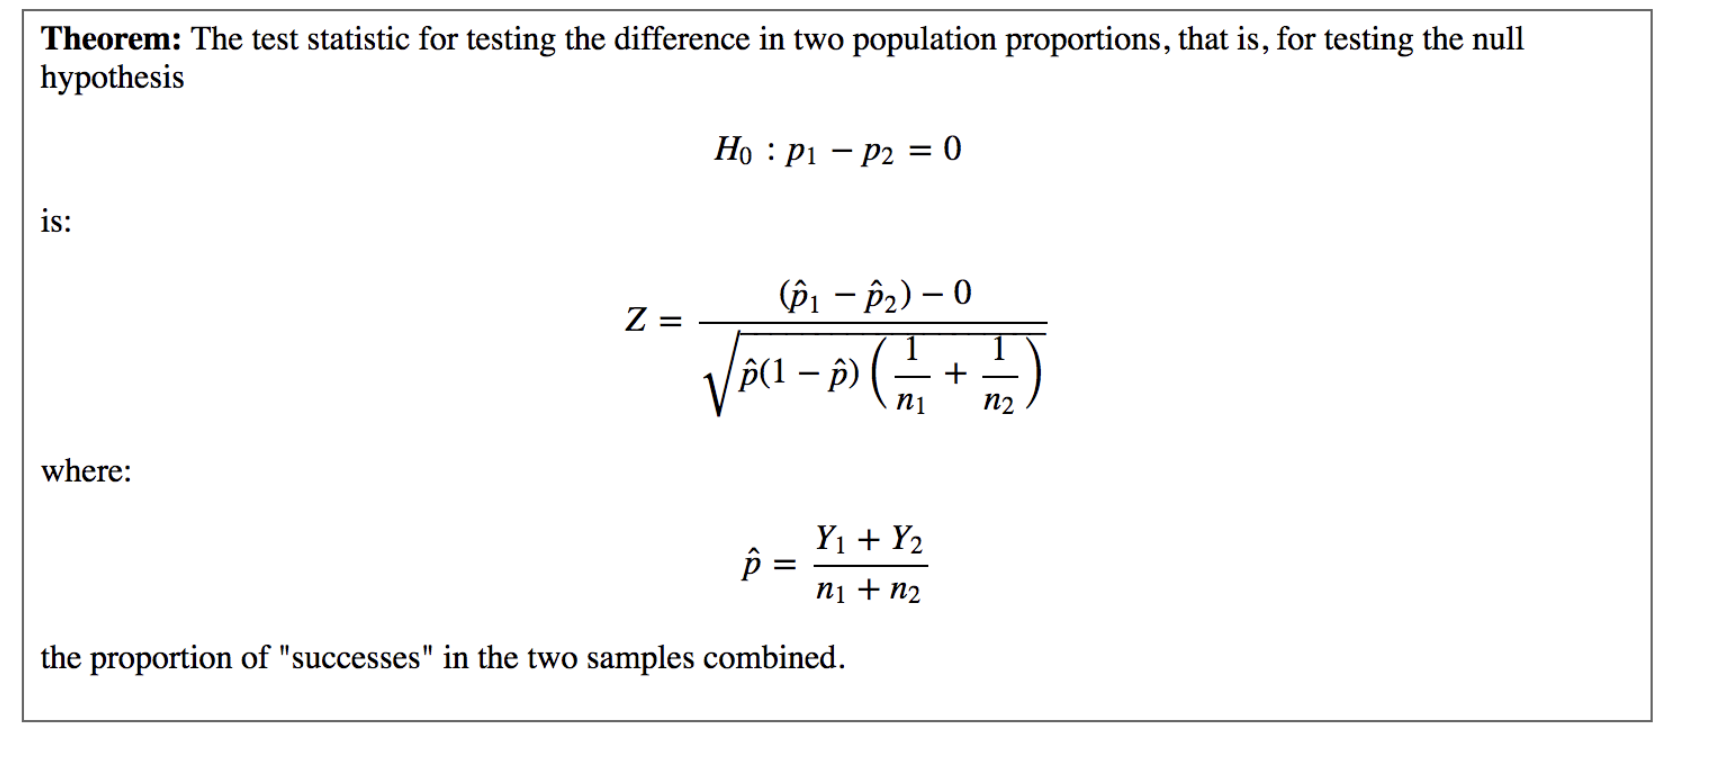

In [6]:
Image("ztest.png")

In [7]:
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.4210472764645426


In [8]:
# I am goonna create a little one line function to calculate the standard error
# and to calculate p

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))

In [9]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_2y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z_2y)

20.7697865408


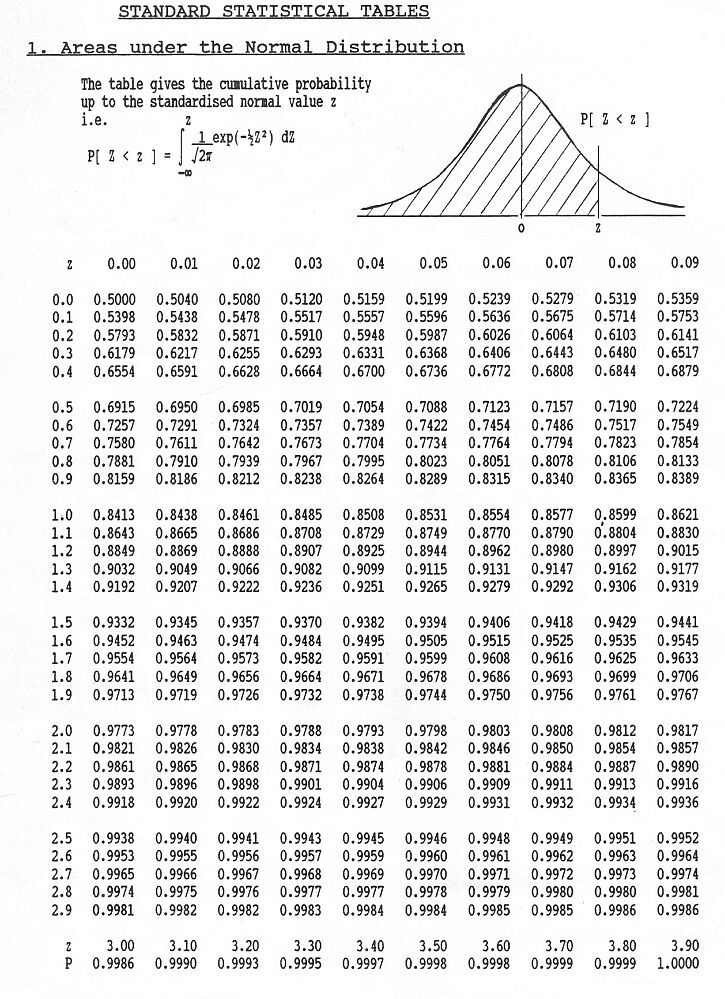

In [10]:
Image('ssTable.png')

In [11]:
## p-value for employment after 2 years: 
## since the largest number we read off the table for is (way) smaller 
## than the value for our statistic 
## our p-value will be smaller than it would be if calculated using 
## (e.g.) .9998 (and in fact using 1.0000 which is the largest number 
## in the table). Using 0.9998 is a **conservative** approach. 

p_2y = 1 - 0.9984


def report_result(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_2y, alpha)

is the p value 0.00 smaller than the critical value 0.05?
YES!
the Null hypothesis is rejected


In [12]:
P_0 = 11.7 * 0.01 
P_1 = 10.0 * 0.01

n_0 = 409
n_1 = 564
    
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)

z_3y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print ('x_3y:',z_3y)

x_3y: -0.846282982605


In [13]:
p_3y = 1 - 0.823

report_result(p_3y, alpha)

is the p value 0.18 smaller than the critical value 0.05?
NO!
the Null hypothesis is not rejected


In [21]:
# implementation of evalChisq 
    
def evalChisq(values):
    if not (len(values.shape) == 2 and values.shape == (2,2)):
        print ("must pass a 2D array")
        return -1
    values = np.array(values)
    E = np.empty_like(values)
    for k in range(len(values[0])):
        for i in range(2):
            
            E[i][k] = ((values[i,:].sum() * values[:,k].sum()) / 
                        (values).sum())
    return ((values - E)**2 / E).sum()

In [28]:
Ntot = 973

sample_values = np.array([[0.701 * 564, 0.299 * 564], [0.0305 * 409, 0.965 * 409]])

print (evalChisq(sample_values))

436.223462575


This number must be compared to the chi sq distribution. You must calculate the number of degrees of freedom forthis experiment. Generally: DOF = Number of observations - number of Independent Variables
so here DOF = 1. Now you can look at the table below and draw conclusions about the rejection of the Null

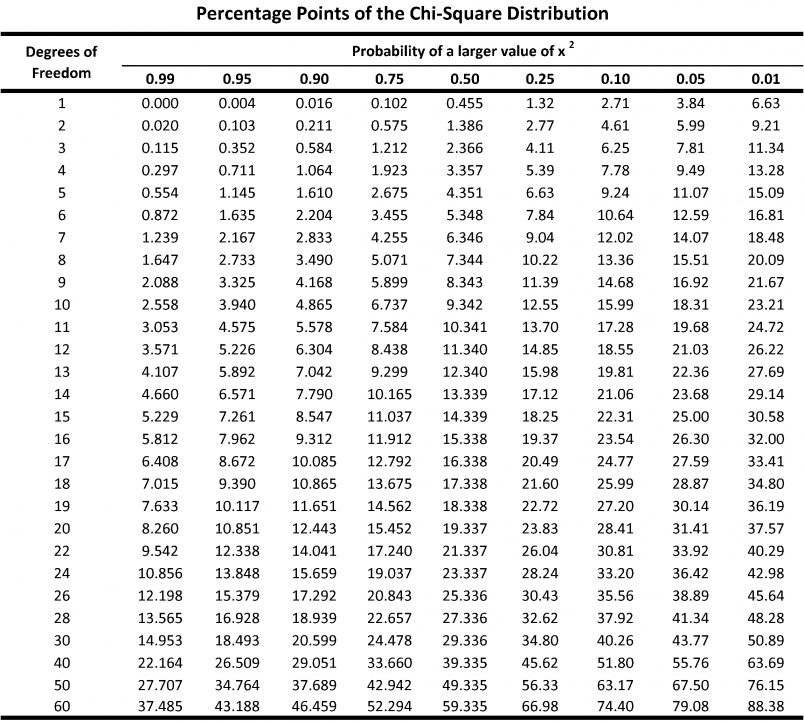

In [30]:
Image('hw6_image3.png')

432 is hella larger then 3.84

why am i mentioning 3.84?

how does the chi square statistic that you derived compare?

please state what that means in terms of your Null hypothesis in a markdown cell below!

##!!!!!! TODO FOR YOU!

lets see what the chi sq statistics says about the conviction for fellonies (row 10)
fill in the contingency table below *

In [31]:
NCFtot = 977 # Total participants

sampleCF_values = np.array([[0.1 * 568, 0.9 * 568], [0.117 * 409, 0.883 * 409]])

print (evalChisq(sampleCF_values))

0.718493917505
